<a href="https://colab.research.google.com/github/cesarlimca/Diplomado-TE-y-MD/blob/main/Modulo4_Proyecto6-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO 6 - Ejercicio 2**
César Adrián Limones Carro

## Librerías y lectura de datos para todo el ejercicio

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc

In [24]:
df = pd.read_excel('ejercicio2.xlsx')
df

,ID,Clase,Predicción
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,0
4,5,1,1
5,6,1,0
6,7,1,1
7,8,1,0
8,9,1,0
9,10,1,1


## **a) Encontrar la matriz de confusión**

La matriz de confusión es una tabla que describe el rendimiento de un modelo de clasificación. Tiene la siguiente estructura:

* **TP** (True Positive): Predicciones correctas de la clase positiva (1).
* **TN** (True Negative): Predicciones correctas de la clase negativa (0).
* **FP** (False Positive): Predicciones incorrectas donde se predice positiva (1) cuando es negativa (0).
* **FN** (False Negative): Predicciones incorrectas donde se predice negativa (0) cuando es positiva (1).

In [25]:
clase = df['Clase']
prediccion = df['Predicción']

cm = confusion_matrix(clase, prediccion)
cm

array([[5, 4],
       [4, 7]])

* 5 TN (True Negatives): El modelo predijo correctamente la clase 0.
* 7 TP (True Positives): El modelo predijo correctamente la clase 1.
* 4 FP (False Positives): El modelo predijo 1 cuando en realidad era 0.
* 4 FN (False Negatives): El modelo predijo 0 cuando en realidad era 1.

El modelo tiene problemas en distinguir correctamente entre clases positivas y negativas. El hecho de que haya 4 falsos positivos y 4 falsos negativos muestra que las predicciones incorrectas están distribuidas en ambas direcciones.

Una alta cantidad de falsos negativos es preocupante en escenarios donde perder un positivo (falla en detectar la clase 1) es costoso. Por ejemplo, en diagnósticos médicos, esto implicaría que la enfermedad no se detecta correctamente.

## **b) Encontrar la precisión (presición de la clase positive), sensitivity, specificity y accuracy (precisión global).**

* Precisión (Precision): Qué tan precisas son las predicciones positivas:

$$
Precision = \frac{TP}{TP + FP}
$$

* Sensibilidad (Recall o TPR): Qué tan bien se predicen los verdaderos positivos:

$$
Sensibilidad = \frac{TP}{TP + FN}
$$

* Especificidad (Specificity o TNR): Qué tan bien se predicen los verdaderos negativos.
$$
Especificidad = \frac{TN}{TN+FP}
$$

* Exactitud (Accuracy): Proporción de predicciones correctas. Se calcula como:
$$
Exactitud = \frac{TP+TN}{TP+TN+FP+FN}
$$

In [26]:
# Nota: .2f es para poner dos decimales en los números
# Precision
precision = precision_score(clase, prediccion)
print(f"Precision: {precision:.2f}")

# Sensibilidad (TPR)
sensibilidad = recall_score(clase, prediccion)
print(f"Sensibilidad (Recall o TPR): {sensibilidad:.2f}")

# Exactitud (Accuracy)
exactitud = accuracy_score(clase, prediccion)
print(f"Exactitud (Accuracy): {exactitud:.2f}")

# Especificidad (no se puede calcular con función, así que se obtienen los datos independientes desde la matriz de confusión)
TN, FP, FN, TP = cm.ravel()
especificidad = TN / (TN + FP)
print(f"Especificidad: {especificidad:.2f}")

Precision: 0.64
Sensibilidad (Recall o TPR): 0.64
Exactitud (Accuracy): 0.60
Especificidad: 0.56


### Interpretaciones:

* **Precisión (Precision): 0.64**

El 64% de las veces que el modelo predijo la clase positiva (1), lo hizo correctamente.

Un valor bajo de precisión implica que el modelo está cometiendo muchos falsos positivos (predice 1 cuando no lo es). Esto puede ser un problema si los falsos positivos tienen consecuencias graves (ejemplo: predecir fraude en un banco).

* **Sensibilidad (Recall o TPR): 0.64**

El 64% de las veces que la clase era positiva (1), el modelo la detectó correctamente.

La sensibilidad refleja qué tan bien el modelo está capturando todos los casos positivos. El 64% indica que hay un 36% de falsos negativos, lo que puede ser preocupante si es más costoso perder positivos que hacer falsos positivos.

* **Especificidad (TNR): 0.56**

El 56% de las veces que la clase era negativa (0), el modelo la predijo correctamente.

La especificidad baja sugiere que el modelo comete muchos falsos positivos. En un sistema de seguridad, por ejemplo, esto significaría que está generando muchas alarmas falsas.

* **Exactitud (Accuracy): 0.60**

El modelo acertó en el 60% de todas sus predicciones, tanto para clase 1 como para clase 0.

La exactitud es una medida global del rendimiento, pero puede ser engañosa cuando hay un desbalance de clases (si hubiera muchas más clases 0 que clases 1, podríamos obtener una buena exactitud simplemente prediciendo siempre 0). En este caso, con clases balanceadas, un 60% indica un rendimiento moderado.

## **c) Encontrar la TPR y FPR**

In [27]:
# Ya se encontró el TPR
TPR = TP / (TP + FN)
print(f"TPR: {TPR:.2f}")

TPR: 0.64


In [28]:
FPR = FP / (FP + TN)
print(f"FPR: {FPR:.2f}")

FPR: 0.44


### Interpretación:

* **TPR (True Positive Rate): 0.64**

Es lo mismo que la sensibilidad, es decir, el 64% de los positivos reales fueron detectados correctamente.


Un TPR moderado significa que el modelo está perdiendo un 36% de los positivos reales. En aplicaciones donde detectar correctamente los positivos es crucial, este valor debe ser lo más cercano a 1 posible.

* **FPR (False Positive Rate): 0.44**

El 44% de las veces que la clase era negativa (0), el modelo la predijo incorrectamente como positiva.


Este es un valor bastante alto y sugiere que el modelo comete muchos errores al identificar negativos. En casos donde los falsos positivos son costosos (como fraude, o detección de spam), esto debe ser minimizado.

## **c) Ubicar el clasificador en un espacio ROC**

**ROC (Receiver Operating Characteristic)**:
Es una curva que compara el TPR contra el FPR. Se utiliza para evaluar el rendimiento de un modelo de clasificación en diferentes umbrales de decisión. El área bajo la curva ROC (AUC) es una métrica clave para medir la capacidad de un modelo para distinguir entre clases.

Si el AUC fuera 0.50, el modelo no sería mejor que adivinar al azar. Un valor cercano a 1 indica un buen rendimiento.

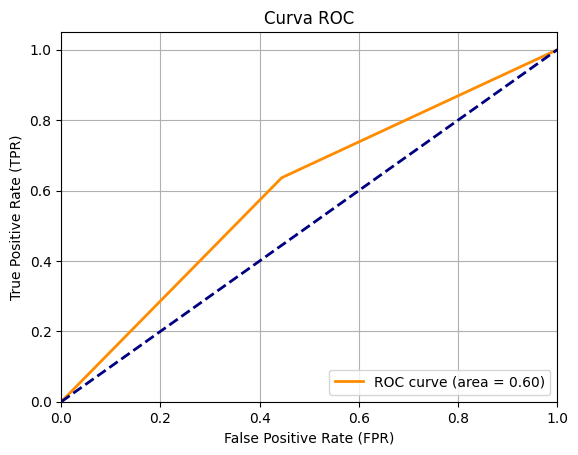

In [29]:
# Obtener valores para ROC
fpr, tpr, _ = roc_curve(clase, prediccion)
roc_auc = auc(fpr, tpr)

# Graficar ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Un clasificador perfecto tendría una curva ROC que pasa por el punto (0,1), lo que significa un TPR del 100% y un FPR del 0%. El valor AUC oscila entre 0.5 (clasificación aleatoria) y 1.0 (clasificación perfecta).

El área bajo la curva (AUC) es 0.60, lo que indica un desempeño moderado del clasificador.

## **Conclusión:**

En general, el modelo tiene un rendimiento moderado. Si el costo de cometer falsos positivos y falsos negativos es bajo, entonces puede ser aceptable. Sin embargo, si las consecuencias de estos errores son serias en cuanto a sus propositos de actividad (ej. en diagnóstico médico o seguridad), el modelo no es confiable.

https://github.com/cesarlimca/Diplomado-TE-y-MD/blob/main/Modulo4_Proyecto6-2.ipynb